# Introduction to Neural Network Classification

### Creating data and fiting the data

In [2]:
from sklearn.datasets import make_circles
Samples = 10000
X, Y = make_circles(Samples,noise=0.03,random_state=42)

In [3]:
# Values of X
X

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       ...,
       [ 0.6854581 ,  0.37297955],
       [ 0.47440334,  0.88491997],
       [-0.67440999,  0.26094865]])

In [4]:
# Labels or the class variable
Y

array([1, 0, 0, ..., 1, 0, 1])

In [5]:
# Lets see the shape of X and Y
X.shape , Y.shape

((10000, 2), (10000,))

In [6]:
import pandas as pd
df = pd.DataFrame({"X0":X[:,0] , "X1":X[:,1] , "Class" : Y})
df.head()

,X0,X1,Class
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0


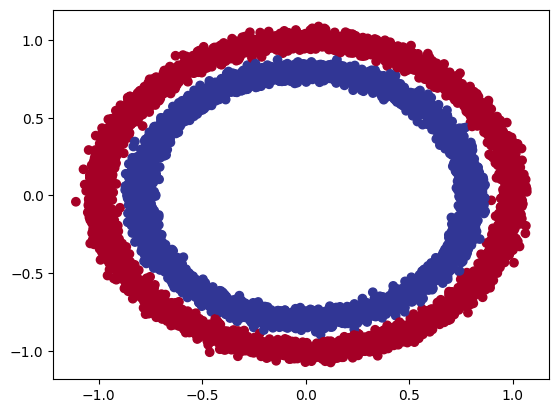

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y ,cmap=plt.cm.RdYlBu)

## Steps in Modeling

1. Create the model
2. compile the model
3. fit the model
4. evaluate the model

In [6]:
import tensorflow as tf

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
model.fit(X,Y,epochs=20)

Epoch 1/20
313/313 [==============================] - 10s 5ms/step - loss: 0.7234 - accuracy: 0.4958
Epoch 2/20
313/313 [==============================] - 1s 5ms/step - loss: 0.6940 - accuracy: 0.4907
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5024
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4981
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.5021
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.4880
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.4943
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5032
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4869
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.497

In [10]:
model.fit(X,Y,epochs=200,verbose=0)

In [11]:
model.evaluate(X,Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4889


[0.6933807134628296, 0.48890000581741333]

## Improving the Model

In [12]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),metrics=["accuracy"])
model1.fit(X,Y,epochs=100,verbose=0)
model1.evaluate(X,Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4813


[0.6931478977203369, 0.4812999963760376]

In [4]:
import numpy as np

In [5]:
def Prediction_Visualization(model,X,Y):
  x_min , x_max = X[:,0].min() - 0.1 , X[: , 0].max() - 0.1
  y_min , y_max = X[:,1].min() - 0.1 , X[:,1].max() - 0.1
  xx , yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

  x_input = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_input)

  if len(y_pred[0]) > 1:
    print("Doing the multiclass classification")
    print(np.argmax(y_pred,axis=1))
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing the binaryclass classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.4)
  plt.scatter(X[:,0],X[:,1],c=Y ,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 1ms/step
Doing the binaryclass classification


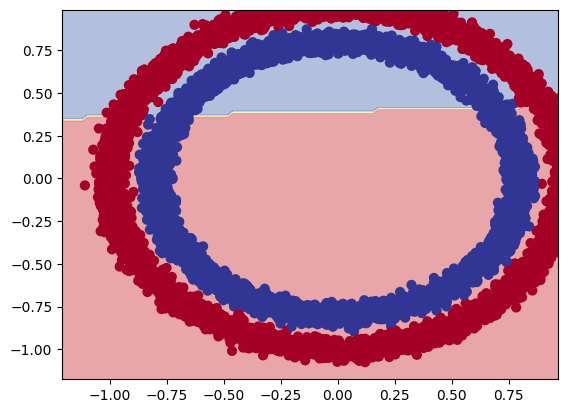

In [15]:
Prediction_Visualization(model1,X,Y)

In [16]:
tf.random.set_seed(452)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(7,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(3,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),metrics=["accuracy"])
model_3.fit(X,Y,epochs=100,batch_size=11)

Epoch 1/100
910/910 [==============================] - 7s 5ms/step - loss: 0.6929 - accuracy: 0.5071
Epoch 2/100
910/910 [==============================] - 4s 4ms/step - loss: 0.6898 - accuracy: 0.5165
Epoch 3/100
910/910 [==============================] - 3s 4ms/step - loss: 0.6779 - accuracy: 0.5482
Epoch 4/100
910/910 [==============================] - 3s 4ms/step - loss: 0.5219 - accuracy: 0.7397
Epoch 5/100
910/910 [==============================] - 4s 5ms/step - loss: 0.2348 - accuracy: 0.9177
Epoch 6/100
910/910 [==============================] - 3s 4ms/step - loss: 0.0755 - accuracy: 0.9794
Epoch 7/100
910/910 [==============================] - 3s 4ms/step - loss: 0.0795 - accuracy: 0.9771
Epoch 8/100
910/910 [==============================] - 4s 4ms/step - loss: 0.0535 - accuracy: 0.9862
Epoch 9/100
910/910 [==============================] - 4s 5ms/step - loss: 0.0481 - accuracy: 0.9849
Epoch 10/100
910/910 [==============================] - 3s 4ms/step - loss: 0.0400 - accura

In [17]:
model_3.evaluate(X,Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9993


[0.002400906989350915, 0.9993000030517578]

313/313 [==============================] - 1s 2ms/step
Doing the binaryclass classification


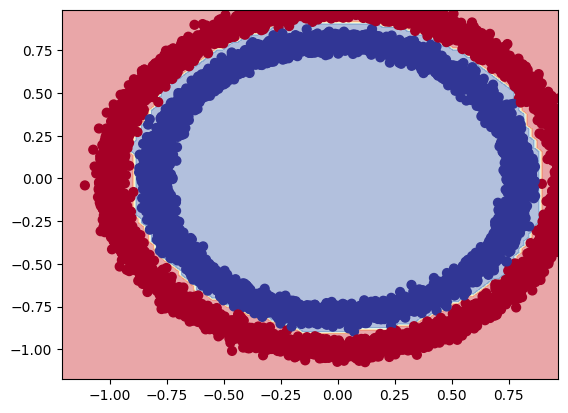

In [18]:
Prediction_Visualization(model_3,X,Y)

## Lets try with the Tanh same function instead of relu

In [19]:
tf.random.set_seed(452)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(7,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(6,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(3,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),metrics=["accuracy"])
history = model_3.fit(X,Y,epochs=50,batch_size=11,verbose=0)

In [20]:
model_3.evaluate(X,Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9995


[0.002037827158346772, 0.9994999766349792]

313/313 [==============================] - 1s 2ms/step
Doing the binaryclass classification


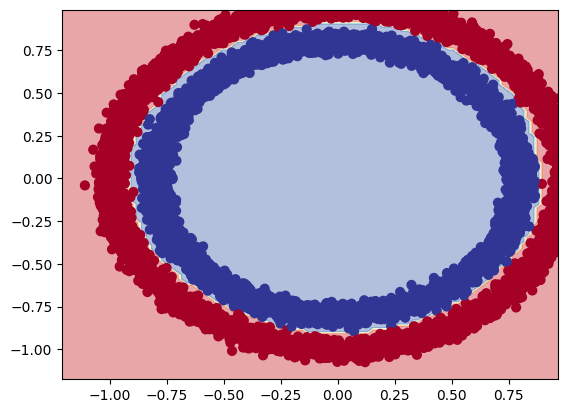

In [21]:
Prediction_Visualization(model_3,X,Y)

In [22]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

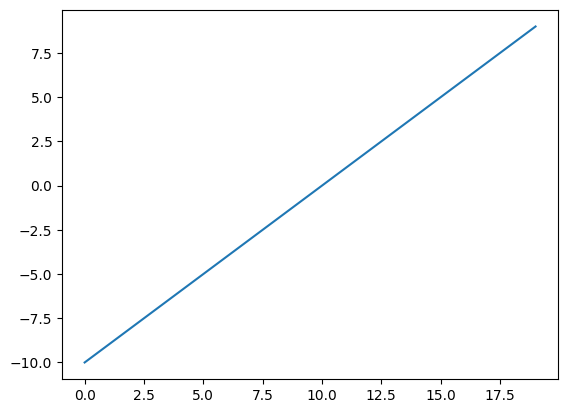

In [23]:
plt.plot(A)

In [24]:
def Sigmoid(x):
   return 1/(1 + tf.math.exp(-x))

B = Sigmoid(A)
B

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

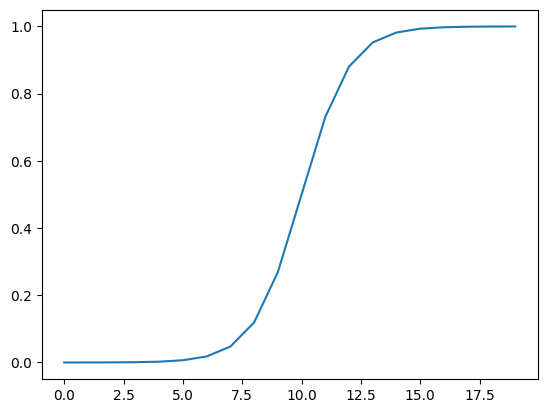

In [25]:
plt.plot(B)

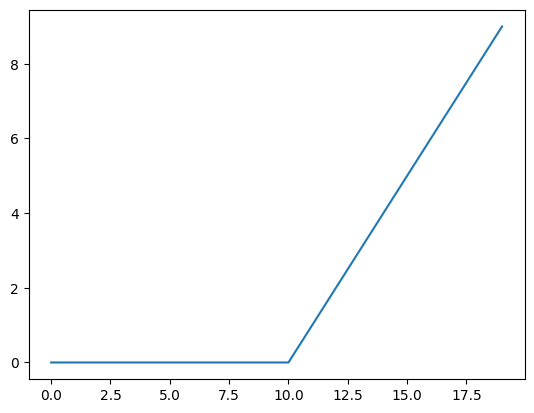

In [26]:
def Relu(X):
  return max(0,X)
C=[]
for i in A:
  C.append(Relu(i))
plt.plot(C)

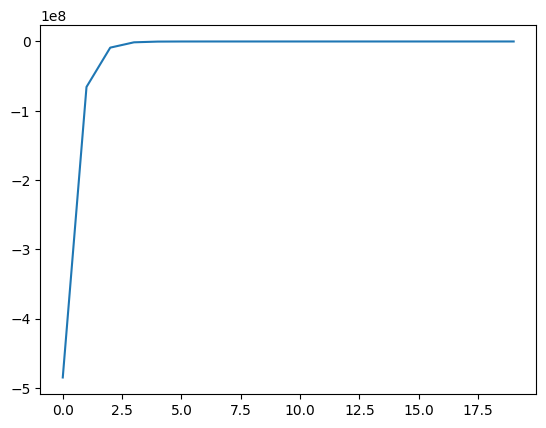

In [27]:
def Tanh(x):
  return (tf.math.exp(x) - tf.math.exp(-x)/ tf.math.exp(x) + tf.math.exp(-x))

plt.plot(Tanh(A))

In [28]:
tf.random.set_seed(49)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(7,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(6,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(3,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
history = model_3.fit(X,Y,epochs=50)

Epoch 1/50
313/313 [==============================] - 4s 4ms/step - loss: 0.6808 - accuracy: 0.5566
Epoch 2/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1553 - accuracy: 0.9477
Epoch 3/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9910
Epoch 4/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9906
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0184 - accuracy: 0.9935
Epoch 6/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0364 - accuracy: 0.9871
Epoch 7/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 8/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9929
Epoch 9/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0169 - accuracy: 0.9948
Epoch 10/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0159 - accuracy: 0.9946

## Loss Curve

In [29]:
import pandas as pd

<Axes: >

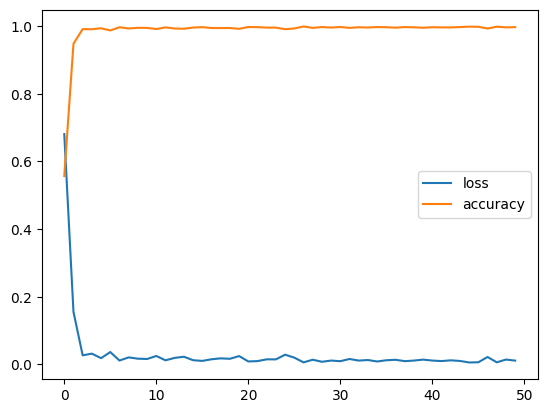

In [31]:
pd.DataFrame(history.history).plot()

In [60]:
## Using callbacks for the model learning rate
callback_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(3,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
callback_model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam() ,metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * (10**(epoch/10)))
histroy = callback_model.fit(X,Y,epochs=100,callbacks=[lr_scheduler],verbose=0)

<Axes: >

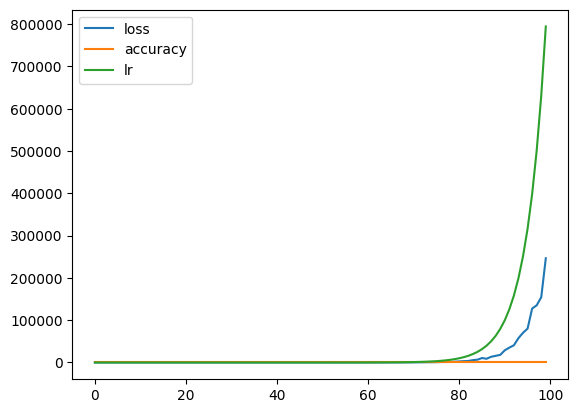

In [61]:
pd.DataFrame(histroy.history).plot()

In [49]:
lrs = 1e-4 * (10 ** (tf.range(100)/10))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
       3.98107171e-01, 5.01187234e-01, 6.30957344e-01, 7.94328235e-01,
       1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.9952

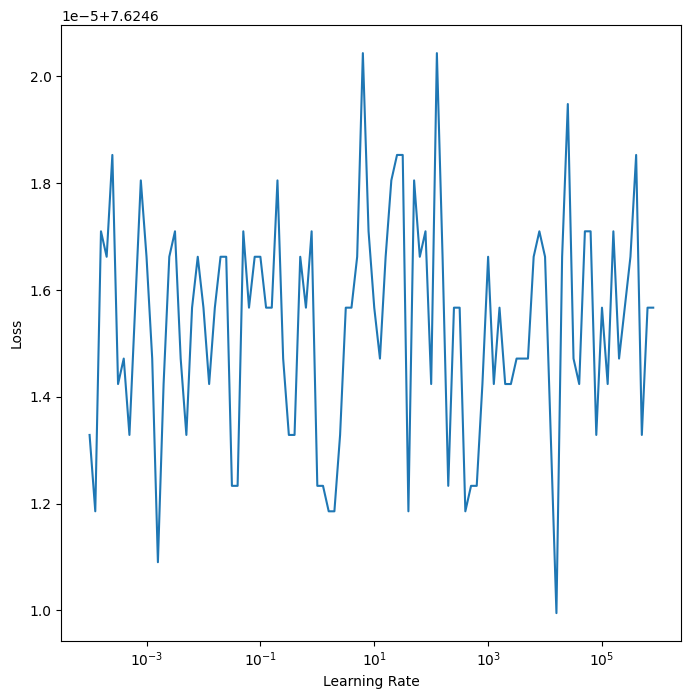

In [55]:
plt.figure(figsize=(8,8))
plt.semilogx(lrs,histroy.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
## Using callbacks for the model learning rate
callback_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(3,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
callback_model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(0.001) ,metrics=["accuracy"])
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * (10**(epoch/10)))
histroy = callback_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
250/250 [==============================] - 7s 7ms/step - loss: 0.6933 - accuracy: 0.5204
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.5556
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6873 - accuracy: 0.5595
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6789 - accuracy: 0.6227
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6610 - accuracy: 0.6805
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6266 - accuracy: 0.7759
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5670 - accuracy: 0.9274
Epoch 8/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.9697
Epoch 9/20
250/250 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.9861
Epoch 10/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3057 - accuracy: 0.9911

<Axes: >

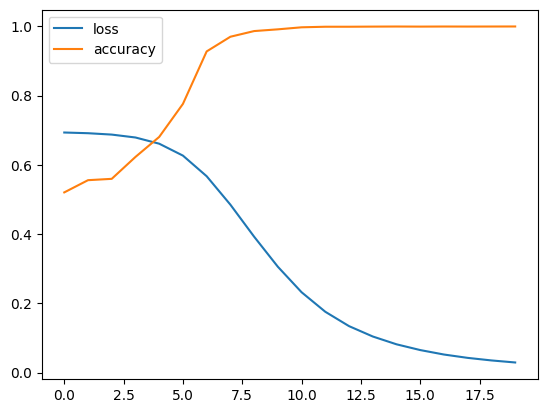

In [11]:
import pandas as pd
pd.DataFrame(histroy.history).plot()

313/313 [==============================] - 1s 2ms/step
Doing the binaryclass classification
313/313 [==============================] - 1s 2ms/step
Doing the binaryclass classification


Text(0.5, 1.0, 'Boundary on testing data')

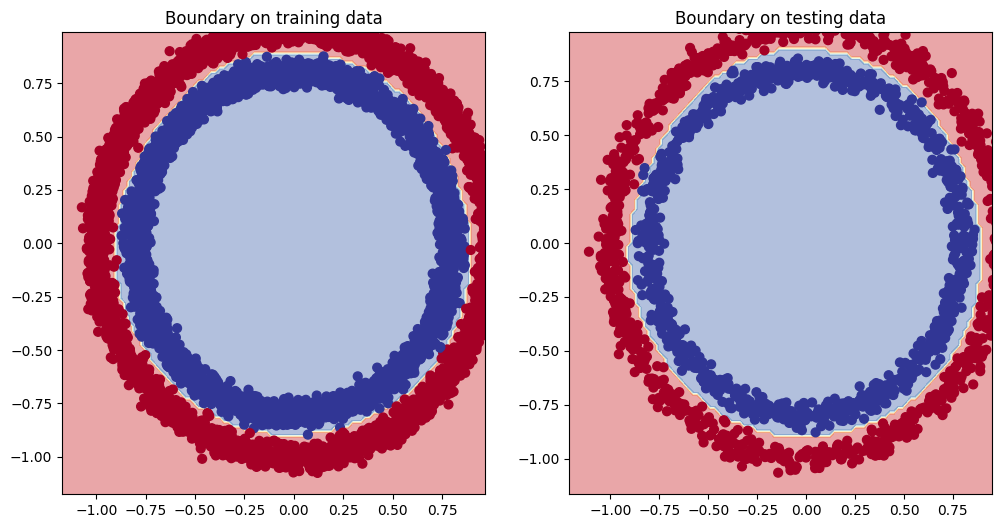

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Prediction_Visualization(callback_model,x_train,y_train)
plt.title("Boundary on training data")
plt.subplot(1,2,2)
Prediction_Visualization(callback_model,x_test,y_test)
plt.title("Boundary on testing data")

## More classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report(Scikit Learn)

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = callback_model(X)

In [20]:
confusion_matrix(Y,tf.round(y_pred))

array([[4998,    2],
       [   7, 4993]])

# Multiclass Classification
* hidden Layers with reLU activation function
* ouput layers with neurons as no of classes and activation function as the softmax
* loss function is categorical cross entropy and in that if our output values are no one hot encoded we use the sparsecategorical_cross_entropy if it is one hot encoded we use the categorical_cross entropy

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [15]:
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
print("Training Data : \n ",x_train[0])
print("Output Label : \n ",y_train[0])

Training Data : 
  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

Text(0.5, 1.0, '9')

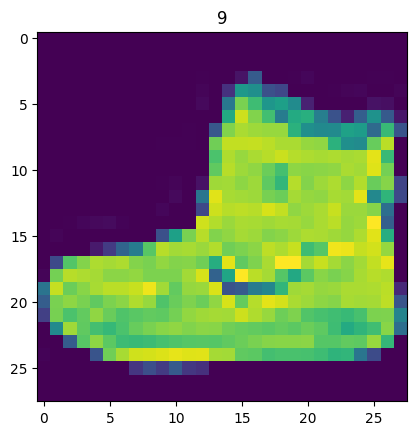

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(y_train[0])

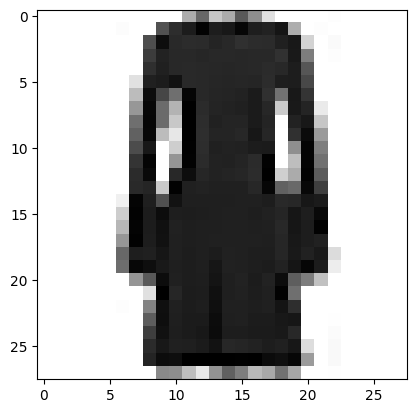

In [20]:
plt.imshow(x_train[49],cmap=plt.cm.binary)

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

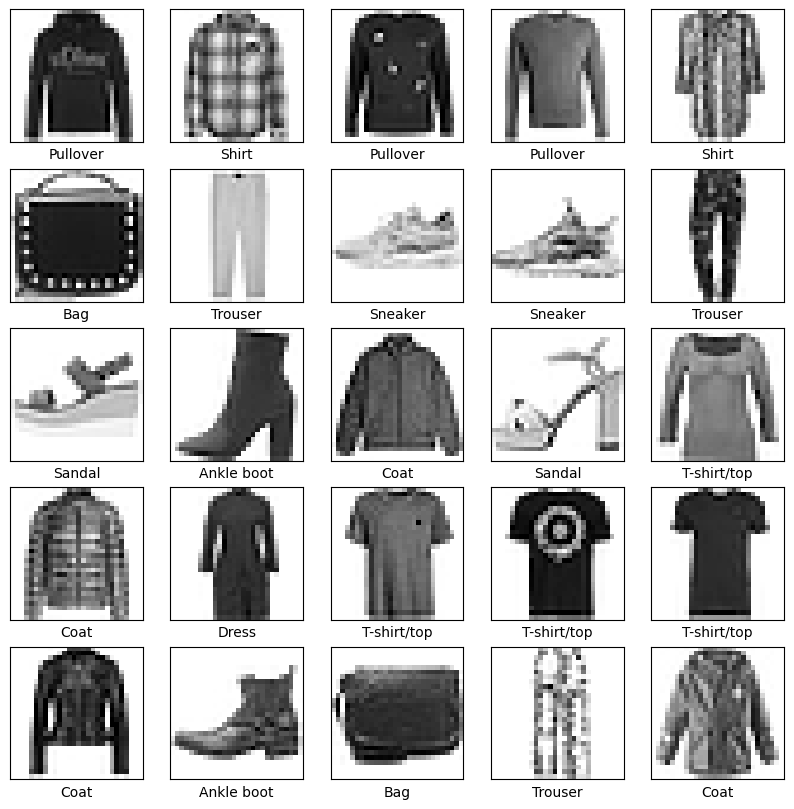

In [25]:
import random
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = random.choice(range(len(x_train)))
    plt.imshow(x_train[index], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[index]])
plt.show()

In [60]:
multi_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax),
    ])
multi_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.001),metrics=["accuracy"])
mulit_model_history = multi_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8579 - accuracy: 0.2639 - val_loss: 1.5750 - val_accuracy: 0.2850
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5575 - accuracy: 0.3045 - val_loss: 1.4293 - val_accuracy: 0.3833
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3571 - accuracy: 0.4286 - val_loss: 1.4345 - val_accuracy: 0.4025
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3146 - accuracy: 0.4369 - val_loss: 1.4276 - val_accuracy: 0.4089
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3425 - accuracy: 0.4191 - val_loss: 1.4174 - val_accuracy: 0.3376
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3526 - accuracy: 0.4167 - val_loss: 1.3291 - val_accuracy: 0.4432
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3069 - accuracy: 0.4215 - val_loss: 1.2965 - val_accuracy:

In [32]:
multi_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 10)                50        
                                                                 
Total params: 3230 (12.62 KB)
Trainable params: 3230 (12.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
test = x_train[0]
test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [54]:
x_train.min() , x_train.max()

(0, 255)

In [53]:
x_norm_train = x_train / 255.0
x_norm_test = x_test / 255.0

In [55]:
x_norm_train.min() , x_norm_train.max()

(0.0, 1.0)

In [61]:
multi_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
multi_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
normal_multi_model =  multi_model.fit(x_norm_train,y_train,epochs=10,validation_data=(x_norm_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9232 - accuracy: 0.6285 - val_loss: 0.8423 - val_accuracy: 0.6454
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7897 - accuracy: 0.6676 - val_loss: 0.7863 - val_accuracy: 0.6760
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7518 - accuracy: 0.6966 - val_loss: 0.7538 - val_accuracy: 0.7014
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7223 - accuracy: 0.7160 - val_loss: 0.7442 - val_accuracy: 0.7103
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7062 - accuracy: 0.7271 - val_loss: 0.7270 - val_accuracy: 0.7243
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6935 - accuracy: 0.7377 - val_loss: 0.7213 - val_accuracy: 0.7314
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6816 - accuracy: 0.7448 - val_loss: 0.7066 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

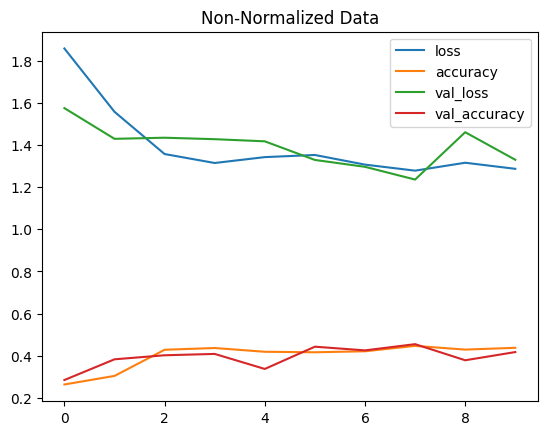

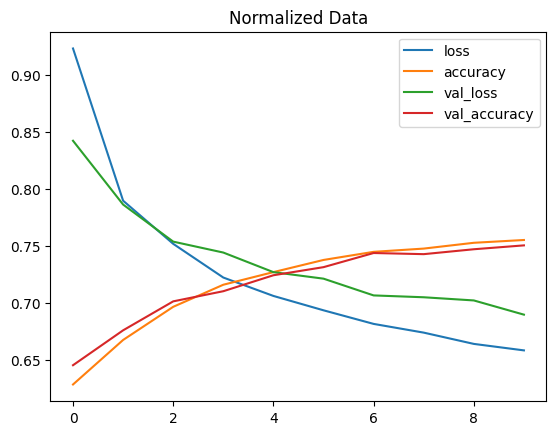

In [72]:
import pandas as pd
pd.DataFrame(mulit_model_history.history).plot(title="Non-Normalized Data")
pd.DataFrame(normal_multi_model.history).plot(title="Normalized Data")

## Ideal Learning Rate

In [86]:
multi_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
multi_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
multi_model_lr = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * (10 ** (epochs/10)))
normal_multi_model =  multi_model_1.fit(x_norm_train,y_train,epochs=40,validation_data=(x_norm_test,y_test), callbacks=[multi_model_lr])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0881 - accuracy: 0.2116 - val_loss: 1.8976 - val_accuracy: 0.2934 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7414 - accuracy: 0.3566 - val_loss: 1.6121 - val_accuracy: 0.3592 - lr: 1.2589e-04
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4338 - accuracy: 0.4227 - val_loss: 1.3187 - val_accuracy: 0.4696 - lr: 1.5849e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2145 - accuracy: 0.4895 - val_loss: 1.1433 - val_accuracy: 0.5236 - lr: 1.9953e-04
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0410 - accuracy: 0.5962 - val_loss: 0.9639 - val_accuracy: 0.6483 - lr: 2.5119e-04
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8053 - accuracy: 0.7279 - val_loss: 0.7411 - val_accuracy: 0.7477 - lr: 3.1623e-04
Epoch 7/40
1875/1875 [============

In [87]:
lrs = 1e-4 * (10**(tf.range(40)/10))
lrs

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
       3.98107171e-01, 5.01187234e-01, 6.30957344e-01, 7.94328235e-01])>

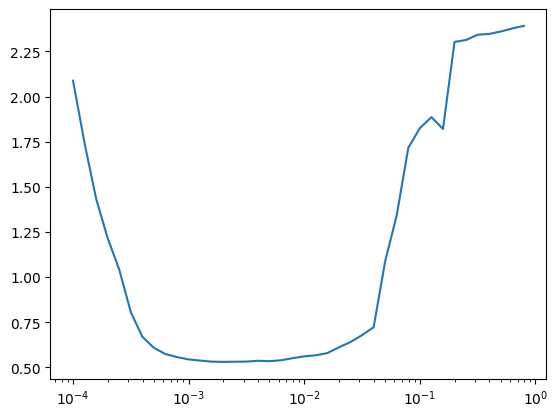

In [88]:
plt.semilogx(lrs,normal_multi_model.history["loss"])

In [89]:
multi_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
multi_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.0001),metrics=["accuracy"])
# multi_model_lr = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * (10 ** (epochs/10)))
normal_multi_model =  multi_model_2.fit(x_norm_train,y_train,epochs=40,validation_data=(x_norm_test,y_test))

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 2.0033 - accuracy: 0.3345 - val_loss: 1.8115 - val_accuracy: 0.4102
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6560 - accuracy: 0.4453 - val_loss: 1.5348 - val_accuracy: 0.4420
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4432 - accuracy: 0.4809 - val_loss: 1.3757 - val_accuracy: 0.5284
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3079 - accuracy: 0.5886 - val_loss: 1.2597 - val_accuracy: 0.6128
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1987 - accuracy: 0.6265 - val_loss: 1.1603 - val_accuracy: 0.6328
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1049 - accuracy: 0.6418 - val_loss: 1.0763 - val_accuracy: 0.6427
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0285 - accuracy: 0.6477 - val_loss: 1.0107 - val_accuracy:

In [94]:
multi_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
multi_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.0001),metrics=["accuracy"])
# multi_model_lr = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * (10 ** (epochs/10)))
normal_multi_model =  multi_model_2.fit(x_norm_train,y_train,epochs=40,validation_data=(x_norm_test,y_test))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0196 - accuracy: 0.2648 - val_loss: 1.7354 - val_accuracy: 0.3868
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5211 - accuracy: 0.4844 - val_loss: 1.3917 - val_accuracy: 0.5570
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2947 - accuracy: 0.5842 - val_loss: 1.2327 - val_accuracy: 0.5942
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1731 - accuracy: 0.5988 - val_loss: 1.1474 - val_accuracy: 0.6014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1034 - accuracy: 0.6073 - val_loss: 1.0921 - val_accuracy: 0.6097
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0546 - accuracy: 0.6157 - val_loss: 1.0643 - val_accuracy: 0.6039
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0174 - accuracy: 0.6213 - val_loss: 1.0209 - val_accuracy:

In [95]:
x_test.shape

(10000, 28, 28)

In [98]:
predictions = multi_model_2.predict(x_test)

313/313 [==============================] - 1s 2ms/step


7


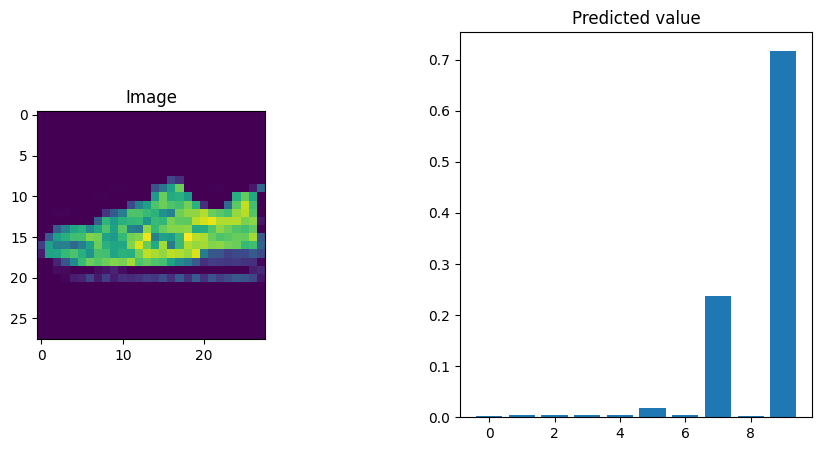

In [111]:
test_index = 1603
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(x_test[test_index])
plt.title("Image")
plt.subplot(1,2,2)
plt.bar(range(10),predictions[test_index])
plt.title("Predicted value")
print(y_test[test_index])